In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#from xgboost import XGBRegressor

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\sahil\diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.duplicated().sum()

146

In [7]:
df=df.drop_duplicates()
print(df.duplicated().sum())

0


In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#separating x and y from df

In [9]:
Y=df['price']
X=df.drop(['price'],axis=1)

In [10]:
num=X.select_dtypes(include=[np.number])
cat=X.select_dtypes(exclude=[np.number])

numerical feature engineering

In [11]:
num.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [12]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,99%,max
carat,53794.0,0.797780,0.473390,0.2,0.24,0.30,0.31,0.40,0.42,0.54,0.70,0.90,1.04,1.24,1.51,2.18,5.01
depth,53794.0,61.748080,1.429909,43.0,57.90,59.30,60.00,61.00,61.20,61.60,61.80,62.10,62.50,62.90,63.30,65.60,79.00
table,53794.0,57.458109,2.233679,43.0,53.00,54.00,55.00,56.00,56.00,57.00,57.00,58.00,59.00,60.00,60.00,64.00,95.00
x,53794.0,5.731214,1.120695,0.0,4.02,4.29,4.36,4.71,4.82,5.23,5.70,6.08,6.54,6.91,7.30,8.35,10.74
y,53794.0,5.734653,1.141209,0.0,4.04,4.30,4.36,4.72,4.83,5.24,5.71,6.08,6.54,6.90,7.30,8.33,58.90
z,53794.0,3.538714,0.705037,0.0,2.48,2.65,2.69,2.91,2.98,3.22,3.53,3.77,4.03,4.26,4.52,5.15,31.80


clipping function below excludes the outliers present

In [13]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [14]:
num=num.apply(lambda x:outlier_cap(x))

In [15]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,99%,max
carat,53794.0,0.795562,0.464987,0.24,0.24,0.30,0.31,0.40,0.42,0.54,0.70,0.90,1.04,1.24,1.51,2.18,2.18
depth,53794.0,61.744691,1.340372,57.90,57.90,59.30,60.00,61.00,61.20,61.60,61.80,62.10,62.50,62.90,63.30,65.60,65.60
table,53794.0,57.446609,2.173349,53.00,53.00,54.00,55.00,56.00,56.00,57.00,57.00,58.00,59.00,60.00,60.00,64.00,64.00
x,53794.0,5.729885,1.111137,4.02,4.02,4.29,4.36,4.71,4.82,5.23,5.70,6.08,6.54,6.91,7.30,8.35,8.35
y,53794.0,5.731981,1.103578,4.04,4.04,4.30,4.36,4.72,4.83,5.24,5.71,6.08,6.54,6.90,7.30,8.33,8.33
z,53794.0,3.537896,0.685907,2.48,2.48,2.65,2.69,2.91,2.98,3.22,3.53,3.77,4.03,4.26,4.52,5.15,5.15


In [16]:
varselector=VarianceThreshold(threshold=0)
varselector.fit_transform(num)
#get columns to keep and create new dataframe with those only
cols=varselector.get_support(indices=True)
num_1=num.iloc[:,cols]

In [17]:
num_1

,carat,depth,table,x,y,z
0,0.24,61.5,55.0,4.02,4.04,2.48
1,0.24,59.8,61.0,4.02,4.04,2.48
2,0.24,57.9,64.0,4.05,4.07,2.48
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,6.15,6.12,3.74


In [18]:
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index,columns=num_1.columns).add_suffix('_Rank')
num_binned

,carat_Rank,depth_Rank,table_Rank,x_Rank,y_Rank,z_Rank
0,0.0,4.0,1.0,0.0,0.0,0.0
1,0.0,2.0,7.0,0.0,0.0,0.0
2,0.0,0.0,9.0,0.0,0.0,0.0
3,0.0,5.0,4.0,0.0,0.0,0.0
4,0.0,7.0,4.0,0.0,0.0,1.0
...,...,...,...,...,...,...
53935,2.0,3.0,3.0,3.0,4.0,3.0
53936,2.0,6.0,1.0,3.0,3.0,4.0
53937,2.0,6.0,6.0,3.0,3.0,4.0
53938,3.0,4.0,4.0,4.0,4.0,4.0


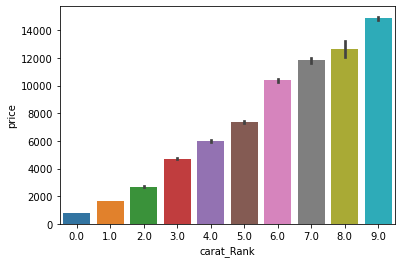

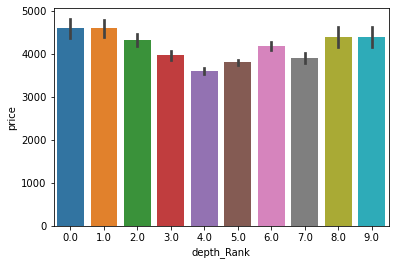

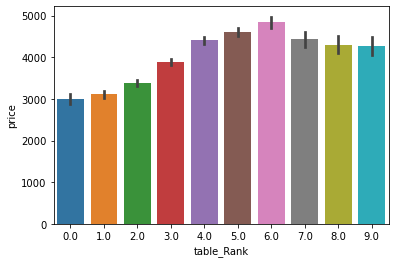

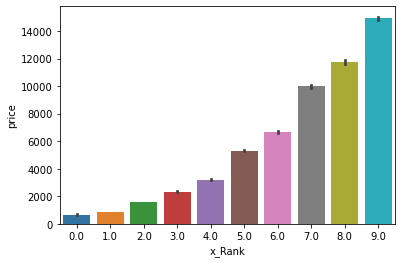

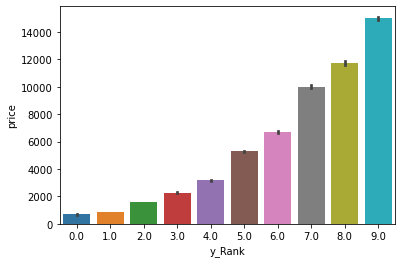

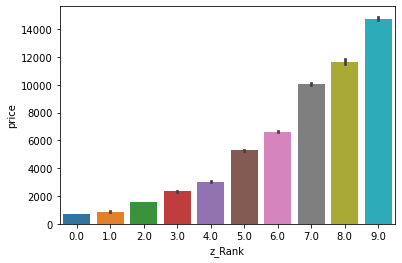

In [19]:
Xbinned=pd.concat([Y,num_binned],axis=1,join='inner')
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col,y='price',data=Xbinned,estimator=mean)
plt.show()

In [20]:
num_1=num_1.drop('depth',1)
num_1.head()

C:\Users\Dell\AppData\Local\Temp/ipykernel_12700/2254368239.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  num_1=num_1.drop('depth',1)


,carat,table,x,y,z
0,0.24,55.0,4.02,4.04,2.48
1,0.24,61.0,4.02,4.04,2.48
2,0.24,64.0,4.05,4.07,2.48
3,0.29,58.0,4.20,4.23,2.63
4,0.31,58.0,4.34,4.35,2.75


in num_1 we dropped depth feature because from figure we can see this is not much slope to be seen as other columns rest feature show a good slope giving an intution that those having an good amount of effect on target figure(ie price 

### categorical feature engineering

In [21]:
cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [22]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cut      53794 non-null  object
 1   color    53794 non-null  object
 2   clarity  53794 non-null  object
dtypes: object(3)
memory usage: 3.7+ MB


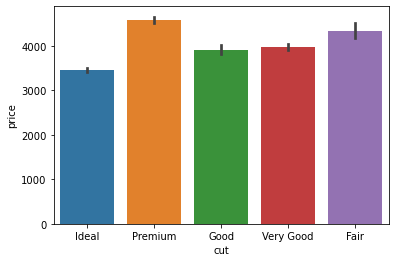

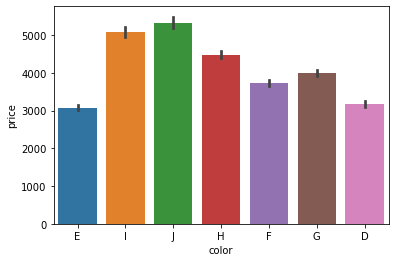

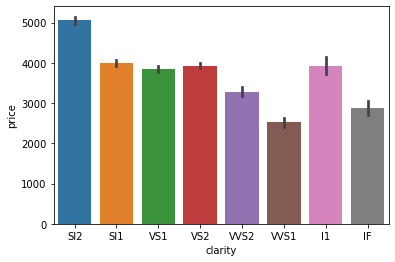

In [23]:
Xchar=pd.concat([Y,cat],axis=1,join='inner')
for col in (cat.columns):
    plt.figure()
    sns.barplot(x=col,y='price',data=Xchar,estimator=mean)
plt.show()

In [24]:
X_char_dum=pd.get_dummies(cat,drop_first=True)
X_char_dum.shape

(53794, 17)

In [25]:
X_char_dum.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [26]:
selector=SelectKBest(chi2,k=15)

here we use kbest to select best feature out of all the categorical feature here k=15 denotes no of features to be selected

In [ ]:
selector.fit_transform(X_char_dum,Y)

In [ ]:
cols=selector.get_support(indices=True)
select_features_df_char=X_char_dum.iloc[:,cols]

In [ ]:
select_features_df_char.head()